In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

In [2]:
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

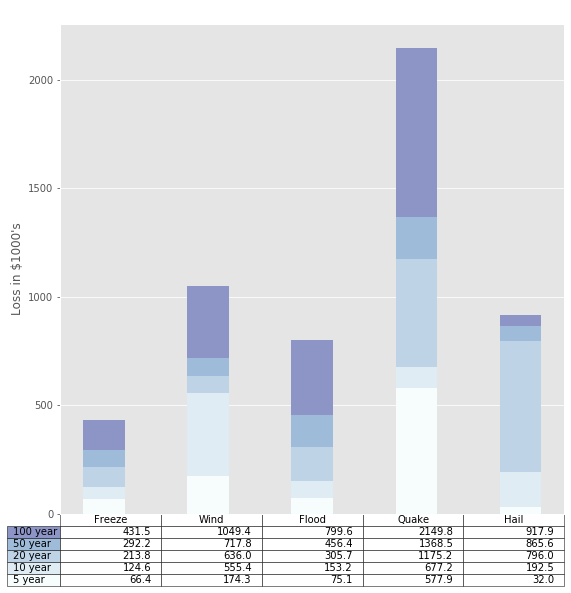

In [52]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / value_increment) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
cell_text.reverse()

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

# colours = [[[0, 0, 0, 1] for e in range(5)] for ee in range(5)]
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                    #   cellColours=colours,
                      rowLabels=rows,
                      rowColours=colors[::-1],
                      colLabels=columns,
                      loc='bottom')
for cell in the_table.get_children():
    cell._text.set_color('black')

# fig.savefig('a.png')